<a href="https://colab.research.google.com/github/adityasahu88/PROJECT/blob/main/insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
## load the data
train = pd.read_csv('train.csv')
test =pd.read_csv('test.csv')
#df =pd.concat([train,test],axis =0)
train = train.copy()

# display 10 records
train.head(10)

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0
5,5,29.0,Male,45963.0,Married,1.0,Bachelor's,NaN,33.053198,Urban,...,2.0,4.0,614.0,5.0,2022-05-20 15:21:39.207847,Average,No,Weekly,House,3202.0
6,6,41.0,Male,40336.0,Married,0.0,PhD,NaN,NaN,Rural,...,2.0,8.0,807.0,6.0,2020-02-21 15:21:39.219432,Poor,No,Weekly,House,439.0
7,7,48.0,Female,127237.0,Divorced,2.0,High School,Employed,5.769783,Suburban,...,1.0,11.0,398.0,5.0,2022-08-08 15:21:39.181605,Average,No,Rarely,Condo,111.0
8,8,21.0,Male,1733.0,Divorced,3.0,Bachelor's,NaN,17.869551,Urban,...,1.0,10.0,685.0,8.0,2020-12-14 15:21:39.198406,Average,No,Monthly,Condo,213.0
9,9,44.0,Male,52447.0,Married,2.0,Master's,Employed,20.473718,Urban,...,1.0,9.0,635.0,3.0,2020-08-02 15:21:39.144722,Poor,No,Daily,Condo,64.0


In [ ]:
# Drop those Features which are not required
train.drop(columns =['id','Gender',
'Marital Status',
'Education Level',
'Occupation',
'Location',
'Policy Start Date',
'Customer Feedback',
'Property Type','Number of Dependents','Vehicle Age','Exercise Frequency'],inplace=True)

test.drop(columns =['id','Gender',
'Marital Status',
'Education Level',
'Occupation',
'Location',
'Policy Start Date',
'Customer Feedback',
'Property Type','Number of Dependents','Vehicle Age','Exercise Frequency'],inplace=True)


` the main objective of the dataset is to find the premium amount `

In [ ]:
# Check any null values
train.isnull().sum()

,0
Age,18705
Annual Income,44949
Health Score,74076
Policy Type,0
Previous Claims,364029
Credit Score,137882
Insurance Duration,1
Smoking Status,0
Premium Amount,0


In [ ]:
# shape of the Dataset
train.shape

(1200000, 9)

In [ ]:
# information of the Dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 9 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Age                 1181295 non-null  float64
 1   Annual Income       1155051 non-null  float64
 2   Health Score        1125924 non-null  float64
 3   Policy Type         1200000 non-null  object 
 4   Previous Claims     835971 non-null   float64
 5   Credit Score        1062118 non-null  float64
 6   Insurance Duration  1199999 non-null  float64
 7   Smoking Status      1200000 non-null  object 
 8   Premium Amount      1200000 non-null  float64
dtypes: float64(7), object(2)
memory usage: 82.4+ MB


In [ ]:
train.describe()

,Age,Annual Income,Health Score,Previous Claims,Credit Score,Insurance Duration,Premium Amount
count,1.181295e+06,1.155051e+06,1.125924e+06,835971.000000,1.062118e+06,1.199999e+06,1.200000e+06
mean,4.114556e+01,3.274522e+04,2.561391e+01,1.002689,5.929244e+02,5.018219e+00,1.102545e+03
std,1.353995e+01,3.217951e+04,1.220346e+01,0.982840,1.499819e+02,2.594331e+00,8.649989e+02
min,1.800000e+01,1.000000e+00,2.012237e+00,0.000000,3.000000e+02,1.000000e+00,2.000000e+01
25%,3.000000e+01,8.001000e+03,1.591896e+01,0.000000,4.680000e+02,3.000000e+00,5.140000e+02
50%,4.100000e+01,2.391100e+04,2.457865e+01,1.000000,5.950000e+02,5.000000e+00,8.720000e+02
75%,5.300000e+01,4.463400e+04,3.452721e+01,2.000000,7.210000e+02,7.000000e+00,1.509000e+03
max,6.400000e+01,1.499970e+05,5.897591e+01,9.000000,8.490000e+02,9.000000e+00,4.999000e+03


We are going to handle the missing values.


For Categorical Information we will use` **Mode**

For Numerical Data will use ` **Mean**

In [ ]:
from sklearn.impute import SimpleImputer
num_col =list(train.select_dtypes(include =np.number).columns)
cat_col =list(train.select_dtypes(exclude =np.number).columns)

test_num_col =list(test.select_dtypes(include =np.number).columns)
test_cat_col =list(test.select_dtypes(exclude =np.number).columns)


# calling the SimpleImpute function
num_impute= SimpleImputer(missing_values=np.nan,strategy ='mean')
cat_impute= SimpleImputer(missing_values=np.nan,strategy ='most_frequent')

test_num_impute= SimpleImputer(missing_values=np.nan,strategy ='mean')
test_cat_impute= SimpleImputer(missing_values=np.nan,strategy ='most_frequent')
train[num_col]=num_impute.fit_transform(train[num_col])
train[cat_col]=cat_impute.fit_transform(train[cat_col])
test[test_cat_col]=test_cat_impute.fit_transform(test[test_cat_col])
test[test_num_col]=test_num_impute.fit_transform(test[test_num_col])


# checking the Null Values
print(f"The total null values in the Training dataset is {train.isnull().sum().sum()}")
print(f"The total null values in the Testing dataset is {test.isnull().sum().sum()}")

The total null values in the Training dataset is 0
The total null values in the Testing dataset is 0


In [ ]:
train["Smoking Status"].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
# find the features
train.iloc[:,:-1].columns


Index(['Age', 'Annual Income', 'Health Score', 'Policy Type',
       'Previous Claims', 'Credit Score', 'Insurance Duration',
       'Smoking Status'],
      dtype='object')

In [ ]:
# Target Columns
list(train.iloc[:,:].columns)[-1]

'Premium Amount'

Lets Visualize the Data for Better Understanding

1) Correlation between columns <br/>
2) Outliers<br/>
3) How the Data are Distributed (Normalized bell curve or not)



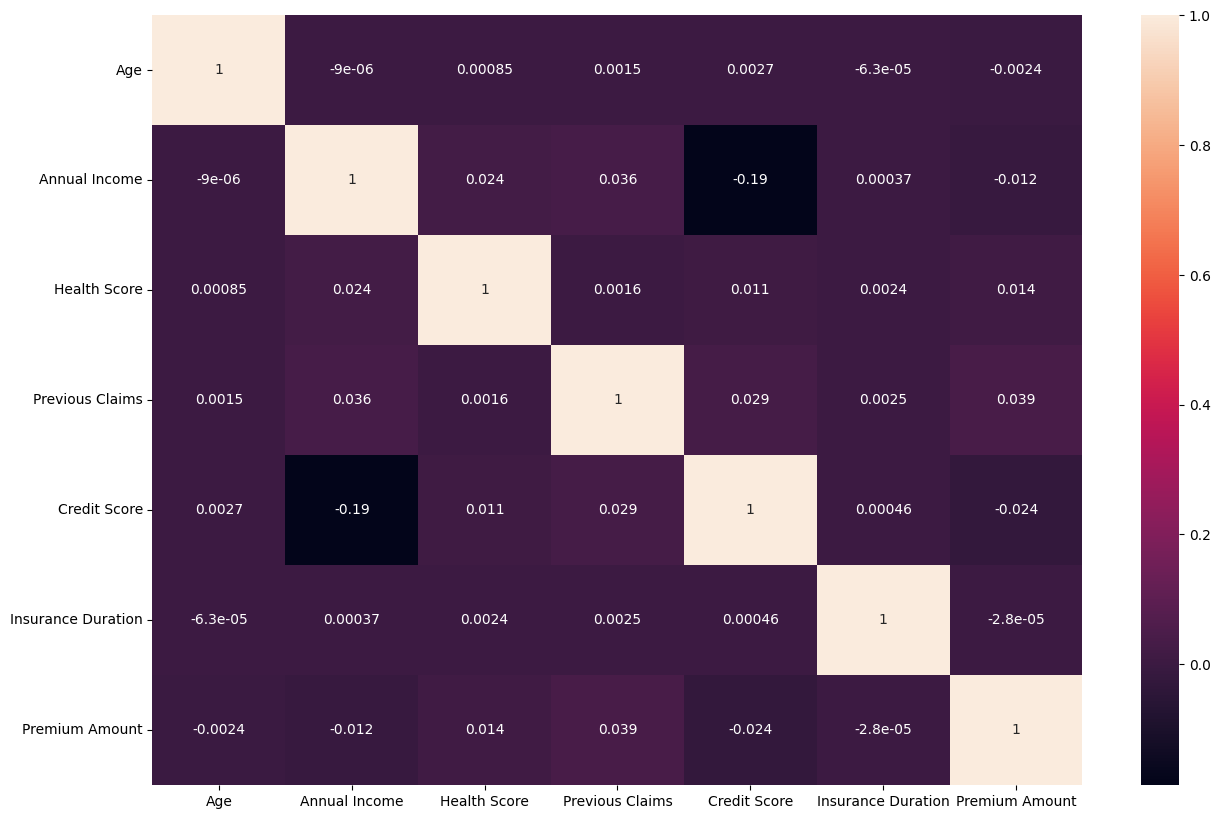

In [ ]:
# Correlation Among Columns :
plt.figure(figsize=(15,10))
num_columns = list(train.select_dtypes(include =np.number).columns)
train[num_columns]
sns.heatmap(train[num_columns].corr(),annot=True)
plt.show()

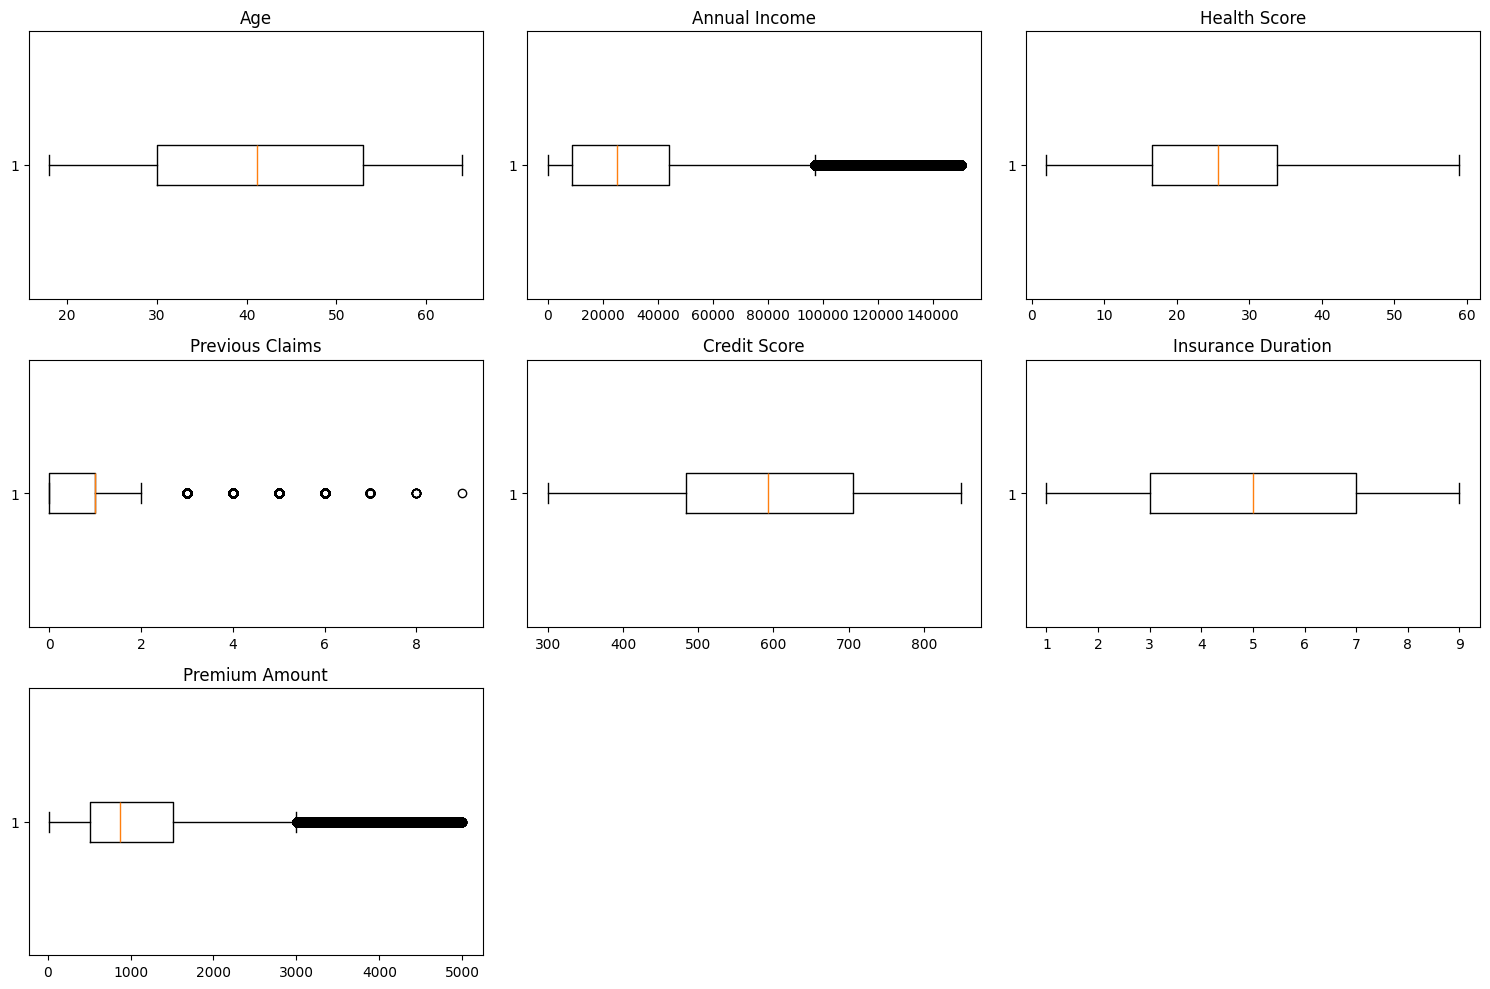

In [ ]:
# Find outliers
import math
# Select numeric columns
num_columns = list(train.select_dtypes(include=np.number).columns)

# Number of numeric columns
number = len(num_columns)

# Define number of columns and rows for subplots
n_columns = 3
n_rows = math.ceil(number / n_columns)  # Ensure enough rows

# Create the figure
plt.figure(figsize=(15, 10))

# Loop through each numeric column and plot a boxplot
for i, col in enumerate(num_columns):
    plt.subplot(n_rows, n_columns, i + 1)
    plt.boxplot(train[col].dropna(), vert=False)  # Boxplot for outliers
    plt.title(col)  # Add title for each subplot



# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

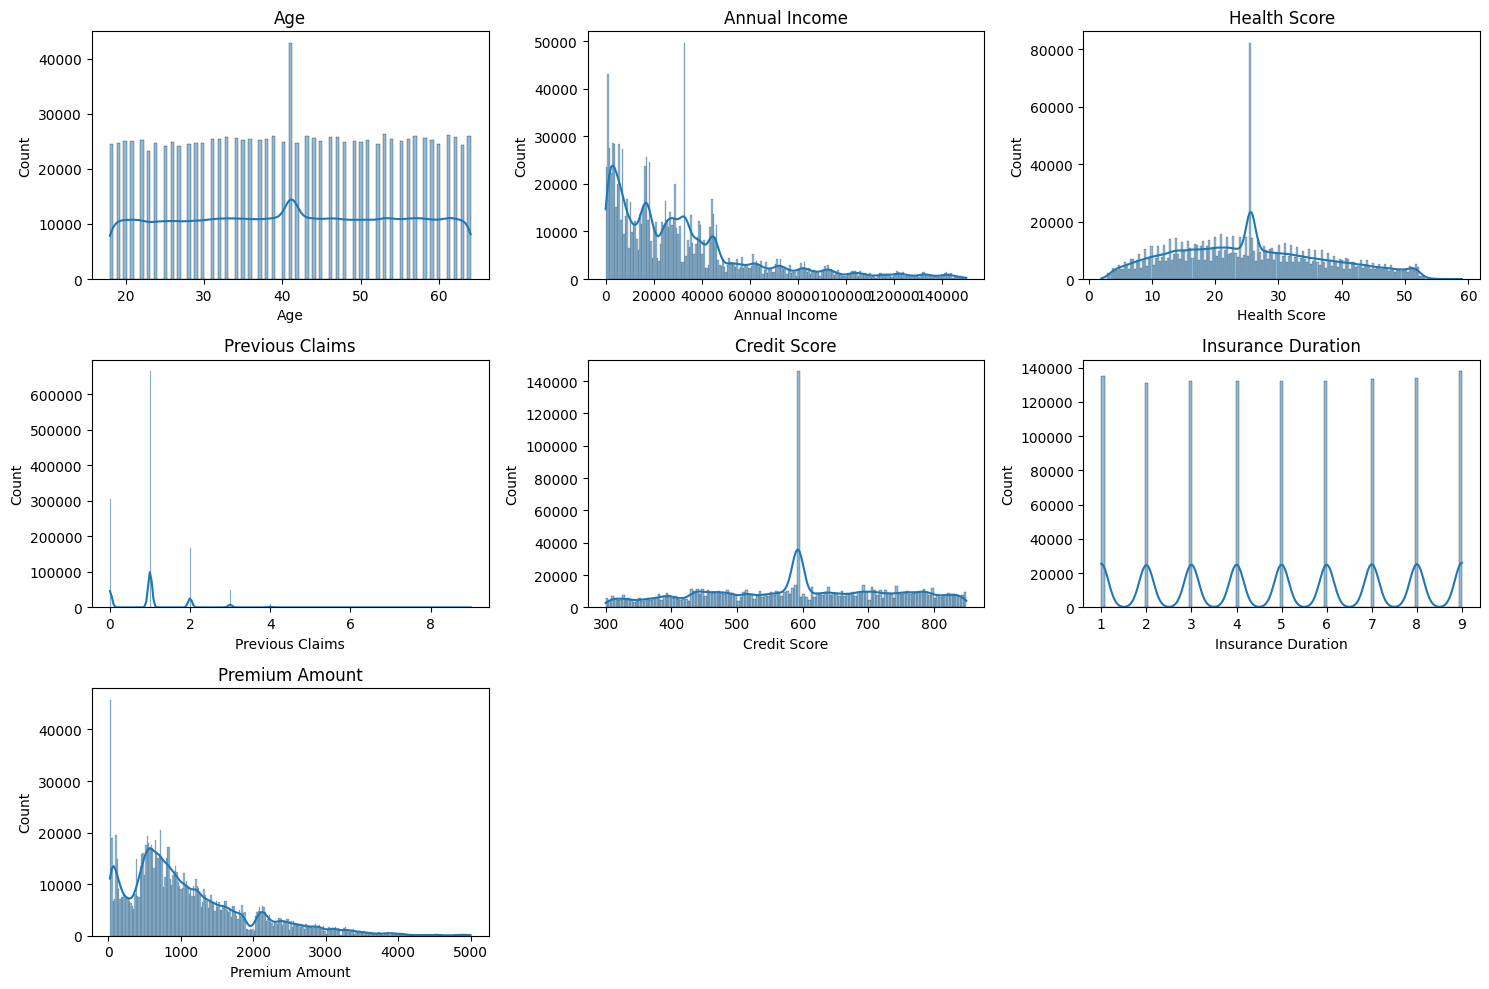

In [ ]:
# Visualize how the data are distributed
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_columns):
    plt.subplot(n_rows, n_columns, i + 1)
    sns.histplot(train[col].dropna(),kde=True)  # Histplot for Data Distribution
    plt.title(col)  # Add title for each subplot
plt.tight_layout()
plt.show()

From the above visualization we find that the Annual Income is having outliers. lets see how to handle the outliers

In [ ]:
# handle outliers for annual income
q1 = train['Annual Income'].quantile(0.25)
q3 = train['Annual Income'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
train = train[(train['Annual Income'] >= lower_bound) & (train['Annual Income'] <= upper_bound)]


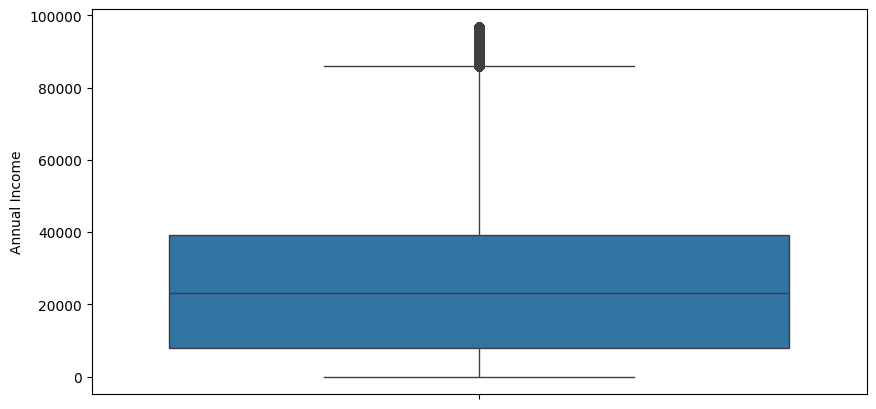

In [ ]:
# lets visualize the Annual Income for crossing checking the Outliers
plt.figure(figsize=(10,5))
sns.boxplot(train['Annual Income'])
plt.show()



Lets Apply the Min Max Scaler for easier computation

In [ ]:
from  sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_columns =list(train.select_dtypes(include=np.number).columns)
train[num_columns]=scaler.fit_transform(train[num_columns])
test[test_num_col]=scaler.fit_transform(test[test_num_col])

We know that the MAchine Learning and Deep Learning works on Numericl Data . Therefore we can convert all the categorical data into numerical.We can use two method :

a) **Label Encoder**<br/>
Label Encoding is a common technique for converting categorical variables into numerical values. Each unique category value is assigned a unique integer based on alphabetical or numerical ordering.


b) **One Hot Encoding**<br/>
It simply creates additional features based on the number of unique values in the categorical feature. Every unique value in the category will be added as a feature. One-Hot Encoding is the process of creating dummy variables.

Note :Therefore for the current Dataset we will use the One hot Encoding





In [ ]:
from sklearn.preprocessing import LabelEncoder

cat_columns = list(train.select_dtypes(exclude=np.number).columns)
test_cat_columns = list(test.select_dtypes(exclude=np.number).columns)

label_encoder = LabelEncoder()
for col in cat_columns:
    train[col] = label_encoder.fit_transform(train[col])
    test[col] = label_encoder.fit_transform(test[col])






Now we are going to apply the machine learning model  for predicting the premium amount

In [ ]:
# Import  the Important Library
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error



In [ ]:
X =train.drop(['Premium Amount'],axis =1)
y =train['Premium Amount']
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size =0.2,random_state =42)


First Model will the Linear Regression

In [ ]:
model =LinearRegression()
model.fit(X_train,y_train)
y_pred =model.predict(X_test)
print(f"The R2 Score is {r2_score(y_test,y_pred)}")
print(f"The Mean Squared Error is {mean_squared_error(y_test,y_pred)}")
print(f"The Root Mean Squared Error is {np.sqrt(mean_squared_error(y_test,y_pred))}")

The R2 Score is 0.002937820584395845
The Mean Squared Error is 0.029284963174455954
The Root Mean Squared Error is 0.17112849901303978


2nd Model Will be the Decision Tree

In [ ]:
model_dt= DecisionTreeRegressor()
model_dt.fit(X_train,y_train)
y_pred_dt =model_dt.predict(X_test)
print(f"The R2 Score is {r2_score(y_test,y_pred_dt)}")
print(f"The Mean Squared Error is {mean_squared_error(y_test,y_pred_dt)}")
print(f"The Root Mean Squared Error is {np.sqrt(mean_squared_error(y_test,y_pred_dt))}")


The R2 Score is -1.0274761994605566
The Mean Squared Error is 0.059549511619314245
The Root Mean Squared Error is 0.24402768617375006


3rd Model Will be the Random Forest

In [ ]:
model_RF= RandomForestRegressor(n_estimators=100)
model_RF.fit(X_train,y_train)
y_pred_RF =model_dt.predict(X_test)
print(f"The R2 Score is {r2_score(y_test,y_pred_RF)}")
print(f"The Mean Squared Error is {mean_squared_error(y_test,y_pred_RF)}")
print(f"The Root Mean Squared Error is {np.sqrt(mean_squared_error(y_test,y_pred_RF))}")


The R2 Score is -1.0274761994605566
The Mean Squared Error is 0.059549511619314245
The Root Mean Squared Error is 0.24402768617375006


In [ ]:
import tensorflow as tf

model_tf = tf.keras.Sequential([
     tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
     tf.keras.layers.Dense(64, activation='relu'),
     tf.keras.layers.Dense(32, activation='relu'),
     tf.keras.layers.Dense(16, activation='relu'),
     tf.keras.layers.Dense(8, activation='relu'),
     tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

model_tf.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model_tf.fit(X_train, y_train, epochs=10, batch_size=5, validation_split=0.2)



Epoch 1/10
144581/144581 ━━━━━━━━━━━━━━━━━━━━ 335s 2ms/step - loss: 0.0293 - mae: 0.1318 - val_loss: 0.0292 - val_mae: 0.1333
Epoch 2/10
144581/144581 ━━━━━━━━━━━━━━━━━━━━ 380s 2ms/step - loss: 0.0291 - mae: 0.1315 - val_loss: 0.0291 - val_mae: 0.1296
Epoch 3/10
144581/144581 ━━━━━━━━━━━━━━━━━━━━ 369s 2ms/step - loss: 0.0290 - mae: 0.1310 - val_loss: 0.0290 - val_mae: 0.1327
Epoch 4/10
144581/144581 ━━━━━━━━━━━━━━━━━━━━ 312s 2ms/step - loss: 0.0289 - mae: 0.1308 - val_loss: 0.0291 - val_mae: 0.1335
Epoch 5/10
144581/144581 ━━━━━━━━━━━━━━━━━━━━ 324s 2ms/step - loss: 0.0290 - mae: 0.1310 - val_loss: 0.0289 - val_mae: 0.1313
Epoch 6/10
144581/144581 ━━━━━━━━━━━━━━━━━━━━ 308s 2ms/step - loss: 0.0290 - mae: 0.1308 - val_loss: 0.0289 - val_mae: 0.1295
Epoch 7/10
144581/144581 ━━━━━━━━━━━━━━━━━━━━ 329s 2ms/step - loss: 0.0288 - mae: 0.1302 - val_loss: 0.0289 - val_mae: 0.1312
Epoch 8/10
144581/144581 ━━━━━━━━━━━━━━━━━━━━ 317s 2ms/step - loss: 0.0288 - mae: 0.1304 - val_loss: 0.0294 - val_mae: